# Final Project Report: Predicting Newsletter Subscription in Minecraft Players
**Broad Question:** What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types? <br>
**Specific Question:** How does age and play time predict the likelihood of an individual subscribing to a game-related newsletter? 

## Introduction

## Methods & Results
1. **Load Data**: Read `players.csv`.<br>
2. **Wrangle/Clean**: Impute missing values.<br>
3. **Summarize**: Compute means and proportions of subscribe.<br>
4. **Visualize**: Plot playtime and age against subscribe.<br>
5. **Analyze**: Use KNN classification to predict `subscribe` with `played_hours` and `Age`.<br>
6. **Visualize Results**: Scatterplot of predictions.<br>

In [10]:
# Load libraries
library(tidymodels)
library(dplyr)
library(ggplot2)

# 1. Load data
link <- "https://raw.githubusercontent.com/clairehsu320/dsci-100-group-project/refs/heads/main/players.csv"
players <- read.csv(link)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


In [4]:
# 4. Visualization 
# Figure 1: Playtime by Subscription
fig1 <- ggplot(players, aes(x = subscribe, y = played_hours)) +
  geom_point(alpha = 0.1) +
  labs(x = "Subscription (FALSE = No, TRUE = Yes)", y = "Playtime (Hours)", 
       title = "Figure 1: Playtime by Subscription Status") +
  theme_minimal()

fig1_2 <- players |>
  group_by(subscribe) |>
  summarise(mean_playtime = mean(played_hours)) |>
  ggplot(aes(x = subscribe, y = mean_playtime, fill = subscribe)) +
  geom_bar(stat = "identity", show.legend = FALSE) +
  labs(x = "Subscription (FALSE = No, TRUE = Yes)", y = "Mean Playtime (Hours)", 
       title = "Figure 1_2: Mean Playtime by Subscription Status") +
  theme_minimal()

# display figure 1
fig1
fig1_2

# Figure 2: Age by Subscription
fig2 <- ggplot(players, aes(x = subscribe, y = Age)) +
  geom_point(alpha = 0.7) +
  labs(x = "Subscription (FALSE = No, TRUE = Yes)", y = "Age (Years)", 
       title = "Figure 2: Age by Subscription Status") +
  theme_minimal()

fig2_2 <- players |>
  group_by(subscribe) |>
  summarise(mean_age = mean(Age)) |>
  ggplot(aes(x = subscribe, y = mean_age, fill = subscribe)) +
  geom_bar(stat = "identity", show.legend = FALSE) +
  labs(x = "Subscription (FALSE = No, TRUE = Yes)", y = "Mean Age (Years)", 
       title = "Figure 2_2: Mean Age by Subscription Status") +
  theme_minimal()

# display figure 2
fig2
fig2_2

ERROR: Error in eval(expr, envir, enclos): object 'players' not found


ERROR: Error in geom_point(ggplot(players, aes(x = played_hours, y = Age))): could not find function "geom_point"


In [ ]:
#5 Data Analysis with KNNset.seed(123)

# Split data
split <- initial_split(players, prop = 0.75, strata = subscribe)
train_data <- training(split)
test_data <- testing(split)
glimpse(train_data) #used to view data properly

# Workflow with standardization
recipe <- recipe(subscribe ~ played_hours + Age, data = train_data) |>
  step_scale(all_predictors()) |>  
  step_center(all_predictors())

# Model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")


#perfroming cross validation
vfold <- vfold_cv(train_data, v = 5, strata = Class)

#fitting the model
knn_fit <- workflow() |>
  add_recipe(ecipe) |>
  add_model(knn_spec) |>
  fit_resamples(resamples = cancer_vfold)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.65


[1] "FALSE" "TRUE"

# A tibble: 1 × 3
  .metric   .estimator .estimate
  <chr>     <chr>          <dbl>
1 precision binary         0.391
# A tibble: 1 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 recall  binary         0.562
          Truth
Prediction FALSE TRUE
     FALSE     9   14
     TRUE      7   30


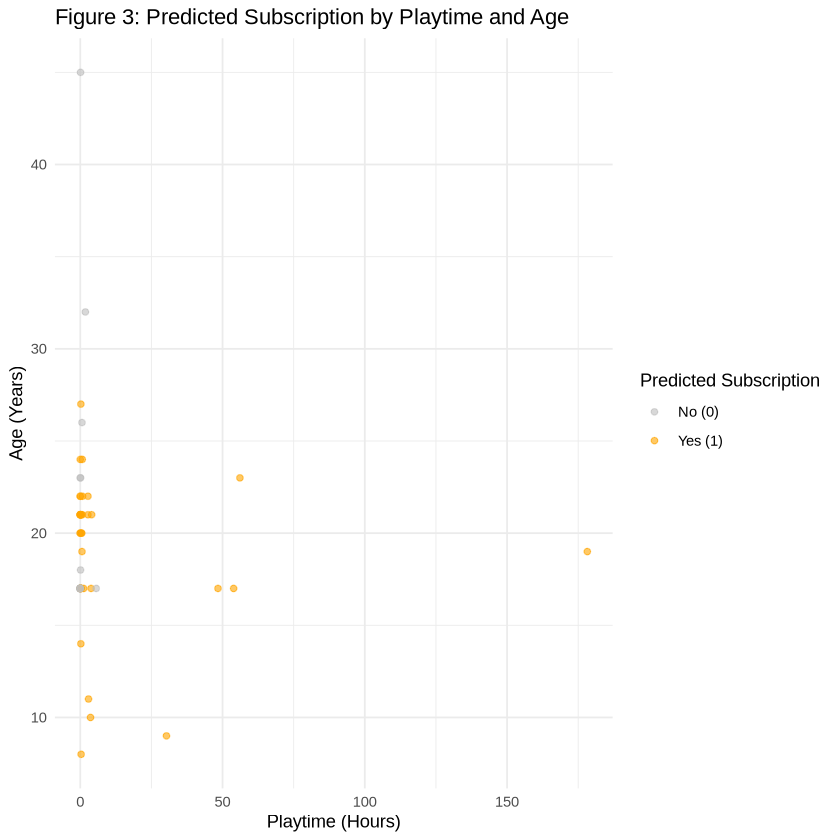

In [56]:
# 5. Data Analysis with KNN
# Split data
set.seed(123)
split <- initial_split(players, prop = 0.7, strata = subscribe)
train_data <- training(split)
test_data <- testing(split)

# Workflow with standardization
recipe <- recipe(subscribe ~ played_hours + Age, data = train_data) |>
  step_scale(all_predictors()) |>  
  step_center(all_predictors()) |>  
  prep()

# Model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
  set_engine("kknn") |>
  set_mode("classification")

# Train model
knn_fit <- knn_spec |>
  fit(subscribe ~ played_hours + Age, data = bake(recipe, train_data))

# Make predictions
test_pred <- predict(knn_fit, new_data = bake(recipe, test_data)) |>
  bind_cols(test_data |> select(subscribe))  

# Accuracy
metrics <- test_pred |>
  metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy")
metrics

# Levels of the response variable
test_pred |> pull(subscribe) |> levels()

# Precision
precision <- test_pred |>
  precision(truth = subscribe, estimate = .pred_class, event_level = "first")
print(precision)

# Recall
recall <- test_pred |>
  recall(truth = subscribe, estimate = .pred_class, event_level = "first")
print(recall)

# Confusion matrix
confusion <- test_pred |>
  conf_mat(truth = subscribe, estimate = .pred_class)
print(confusion)

# 6. Visualization of Analysis
# Figure 3: Predictions Scatterplot
fig3 <- ggplot(test_data, aes(x = played_hours, y = Age, color = test_pred$.pred_class)) +
  geom_point(alpha = 0.6) +
  labs(x = "Playtime (Hours)", y = "Age (Years)", 
       title = "Figure 3: Predicted Subscription by Playtime and Age", 
       color = "Predicted Subscription") +
  scale_color_manual(values = c("gray", "orange"), labels = c("No (0)", "Yes (1)")) +
  theme_minimal()

# display figure 3
fig3

## Discussion

## Reference